<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашнее-задание-для-Junior-DS-по-разработке-PD-модели" data-toc-modified-id="Домашнее-задание-для-Junior-DS-по-разработке-PD-модели-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашнее задание для Junior DS по разработке PD модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li></ul></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Первычный-анализ" data-toc-modified-id="Первычный-анализ-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Первычный анализ</a></span></li><li><span><a href="#Обработка-пропусков,-выбросов-и-дубликатов" data-toc-modified-id="Обработка-пропусков,-выбросов-и-дубликатов-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Обработка пропусков, выбросов и дубликатов</a></span></li><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Баланс <em>классов</em></a></span></li><li><span><a href="#Обработаем-Выбросы-в-выборках-без-фин-отчетности-и-с-фин-отчетностью" data-toc-modified-id="Обработаем-Выбросы-в-выборках-без-фин-отчетности-и-с-фин-отчетностью-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Обработаем Выбросы в выборках без фин отчетности и с фин отчетностью</a></span><ul class="toc-item"><li><span><a href="#Выбросы-в-выборке-с-фин-отчетностью" data-toc-modified-id="Выбросы-в-выборке-с-фин-отчетностью-1.1.5.1"><span class="toc-item-num">1.1.5.1&nbsp;&nbsp;</span>Выбросы в выборке с фин отчетностью</a></span></li><li><span><a href="#Выбросы-выборки-без-фин-данных" data-toc-modified-id="Выбросы-выборки-без-фин-данных-1.1.5.2"><span class="toc-item-num">1.1.5.2&nbsp;&nbsp;</span>Выбросы выборки без фин данных</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Отбор-признаков" data-toc-modified-id="Отбор-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Отбор признаков</a></span><ul class="toc-item"><li><span><a href="#WOE" data-toc-modified-id="WOE-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>WOE</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-результата" data-toc-modified-id="Выгрузка-результата-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Выгрузка результата</a></span></li></ul></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

# Домашнее задание для Junior DS по разработке PD модели

<b>Задание:</b> Необходимо разработать модель предсказания дефолта. Даны финансовые данные 32 395 компаний (выручка, активы, пассивы и т.д). Результат будет оцениваться на скрытой выборке из 200 компаний по метрике качества accuracy_score

<b>Цель задания</b> научиться / показать знания в разработке моделей оценки риска - probability of default. Задание приближено к реальному, данные синтетические. Лидерборд для оценки собственного решения и геймификации процесса обучения. Первое место в лидерборде не является целью. Цель - правильно разработанная модель, удовлетворяющая требованиям банковской системы. В случае возникновения вопросов, сотрудники блока Риски готовы проконсультировать и дать обратную связь на модель (телеграм чат).

<b>Метрика качества</b> accuracy_score вычисляется, как ( True positive + True negative ) / Total. Если сабмит-файл, неправильного формата или неверное количество строк, метрика будет = 0.

### Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from scipy import stats 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Обработка данных


### Загрузка данных

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv', sep=';')
test_df = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv', sep=';')
desc_df = pd.read_csv('https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv', sep=';')

In [3]:
# Тута технический код на него не надо смотреть
class Grapher:
    def __init__(self, 
                 train, test=[], target_col = 'default_12m',
                 figsize = (10,5), target_colors = {0:'gray',1:'red'}
                 ):         

        self.df_original = (train,test)
        self.target = train[target_col]
        self.df = train.drop(columns=[target_col])
        self.dfs_by_target = [train[train[target_col]==target_value] for target_value in train[target_col].unique()]

        self.test = test

        self.plt_figsize = figsize
        self.plt_colored_target = self.target.map(target_colors)
        self.fplt_dims = {self.scatter:2,
                          self.scatter3d:3,
                          self.hist:1}

    def show_cyclic(self,fplt):
        '''
        shows #[n-constant] fplt plots of df with cyclic change in the dimensions
        Example:
            g = Grapher( pd.DataFrame({a:[],b:[],c:[]}) )
            g.show_cyclic(g.scatter) 
            -> 
            prints scatter plots with cyclic change in the dimensions:
            g.scatter(a,b);g.scatter(b,c);g.scatter(c,a)
        !: 
            it will show #[n-constant] graphics (it is almost always less than #qty of df columns)
        '''

        n=self.fplt_dims[fplt]
        index_start = 0
        for i in range(len(self.df.columns)-n):
            fplt(*(self.df.columns[0+i:n+i]))

    
    def show_all(self,fplt):
        '''
        shows all possible fplt plots of df
        Example:
            g = Grapher( pd.DataFrame({a:[],b:[],c:[]}) )
            g.show_all(g.scatter) 
            -> 
            prints all possible scatter plots:
            g.scatter(a,b);g.scatter(a,c);g.scatter(b,c)
        !: 
            if many df columns then there are too many graphs to show
        '''

        from itertools import combinations as combi
        n=self.fplt_dims[fplt]

        for dims in combi(self.df.columns,n):
            fplt(*dims)

    def show_separate(self, fplt):
        '''
        should show 3 fplt plots side by side: 
        {{default+alive,default,alive}}
        In general should show n+1 fplt plots side by side:
        {{everething, target_group_1, target_group_2, ... , target_group_n}}
        '''
        # all = self.df
        # dead = all[self.target == 1]
        # alive = all[all[self.target != 1]

        # all = Grapher(train=all)
        # dead = Grapher(train=dead)
        # alive = Grapher(train=alive)

        # all.scatter3d()
        # dead.scatter3d()
        # alive.scatter3d()
        pass
    
    def scatter(self,
                x_name = 'bus_age', y_name = 'ul_capital_sum',
                alpha = 0.3,
                xscale = 'linear',
                yscale = 'linear'
                ):
        
        fig, ax = plt.subplots(figsize=self.plt_figsize)

        ax.scatter(
                x = self.df[x_name], 
                y = self.df[y_name], 
                c = self.plt_colored_target,
                alpha = alpha
                )
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        plt.xlabel(x_name)
        plt.ylabel(y_name)

        plt.show()

    def scatter3d(self,
                  x_name='ul_capital_sum',
                  y_name='ul_founders_cnt',
                  z_name='bus_age',
                  alpha = 0.3,
                  xscale = 'linear',
                  yscale = 'linear',
                  zscale = 'linear'):
        
        fig = plt.figure(figsize=self.plt_figsize)
        ax = fig.add_subplot(projection='3d')

        ax.scatter(self.df[x_name], 
                   self.df[y_name], 
                   self.df[z_name], 
                   c = self.plt_colored_target,
                   alpha = alpha)
        
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        ax.set_zscale(zscale)
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_zlabel(z_name)

        plt.show()

    def hist(self,
             x_name='ar_revenue',
             n_bins = 30,
             alpha = 0.3,
             xscale = 'linear',):
        
        fig, ax =  plt.subplots(figsize=self.plt_figsize)

        
        # for i,color in self.plt_colored_target.items():
        dim_0 = self.df[self.target == 0][x_name]
        dim_1 = self.df[self.target != 0][x_name]
        ax.hist(dim_0, n_bins, stacked=True, density=False,color='Gray')
        ax.hist(dim_1, n_bins, stacked=True, density=False,color='Red')
        ax.set_title(x_name)


        # ax.set_ylabel('Scores')
        # ax.set_title('Scores by group and gender')
        # ax.legend()

        plt.show()

    def hist3d(self, n_bins = 10):
        pass

df_ab = train_df.iloc[:,:24]
df_ab['default_12m'] = train_df['default_12m'] 

size = (6,3)
g = Grapher(train = df_ab, figsize=size)
gt = Grapher(train = df_ab[df_ab.default_12m == 0], figsize=size)
gm = Grapher(train = df_ab[df_ab.default_12m != 0], figsize=size)

### Первычный анализ

In [4]:
train_df.head(10)

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,0.0,1198000.0,0.0,7240000.0,4988000.0,2252000.0,0.0,255000.0,1198000.0,663000.0,15872000.0,0.0,11349000.0,4523000.0,0.0,198,136,3,3,3,[1-100],50000.0,2,0,0,0,0
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,135,12,12,12,[1-100],10000.0,5,0,0,0,0
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,28,28,28,[1-100],10000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,0.0,1919000.0,0.0,4245000.0,4082000.0,163000.0,0.0,25000.0,1919000.0,2219000.0,3652000.0,0.0,3652000.0,0.0,0.0,185,139,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,0.0,711000.0,0.0,8950000.0,8606000.0,344000.0,0.0,492000.0,711000.0,12439000.0,1279000.0,0.0,0.0,1279000.0,0.0,220,138,27,27,27,[1-100],10000.0,2,0,0,0,0
5,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,100,5,5,5,[1-100],350000.0,1,0,0,0,0
6,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266,27,7,7,7,[1-100],35000.0,3,0,0,0,0
7,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,31,30,30,30,[1-100],10000.0,2,0,0,0,0
8,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,27,26,26,26,[1-100],10000.0,1,0,0,0,0
9,40,125432000.0,122655000.0,122655000.0,0.0,0.0,2777000.0,-63000.0,2714000.0,579000.0,0.0,2135000.0,0.0,24680000.0,8263000.0,16417000.0,0.0,106000.0,2135000.0,11267000.0,11912000.0,0.0,13000.0,11899000.0,0.0,170,132,15,15,15,(100-500],10000.0,2,0,0,0,0


Рассмотрим описание колонок во второй таблице:

In [5]:
desc_df.head(50)

,field,desc_eng,desc_rus
0,ar_revenue,Sales revenue (at the end of the last year),Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Total expenses for the last year,Общие расходы за последний год
2,ar_sale_cost,Cost of sales (at the end of the last year),Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Selling expenses (at the end of the last year),Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Administrative expenses (at the end of the las...,Управленческие расходы (на конец последнего года)
5,ar_sale_profit,Profit from sales (at the end of the last year),Прибыль от реализации (на конец последнего года)
6,ar_balance_of_rvns_and_expns,Balance of income and expenses (at the end of ...,Баланс доходов и расходов (на конец последнего...
7,ar_profit_before_tax,Gross Profit (end of last year),Валовая прибыль (на конец последнего года)
8,ar_taxes,Current income tax (at the end of the last year),Текущий на налог на прибыль (на конец последне...
9,ar_other_profit_and_losses,Other income and expenses (at the end of the l...,Прочие доходы и расходы (на конец последнего г...


Признаки отражают финансовую отчетность компании. На основе этих признаков мы сможем расчитать финансовые мультипликаторы, которые будут яснее отображать финансовую устойчивость компании, а, соотсветственно, и лучше демонстрировать вероятность дефолта. 

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32395 entries, 0 to 32394
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     32395 non-null  int64  
 1   ar_revenue                    17250 non-null  float64
 2   ar_total_expenses             17250 non-null  float64
 3   ar_sale_cost                  17250 non-null  float64
 4   ar_selling_expenses           17250 non-null  float64
 5   ar_management_expenses        17250 non-null  float64
 6   ar_sale_profit                17250 non-null  float64
 7   ar_balance_of_rvns_and_expns  17250 non-null  float64
 8   ar_profit_before_tax          17250 non-null  float64
 9   ar_taxes                      17250 non-null  float64
 10  ar_other_profit_and_losses    17250 non-null  float64
 11  ar_net_profit                 17250 non-null  float64
 12  ab_immobilized_assets         17250 non-null  float64
 13  a

У нас есть 1 категориальный признак. Это количество сотрудников.
Можем закодировать через LabelEncoding, тк видна четкая иерархия. 

In [7]:
train_df['ul_staff_range'].value_counts()

[1-100]      29281
(100-500]     2757
> 500          357
Name: ul_staff_range, dtype: int64

In [8]:
le = preprocessing.LabelEncoder()
le.fit(train_df['ul_staff_range'])
train_df['ul_staff_range'] = le.transform(train_df['ul_staff_range'])
test_df['ul_staff_range'] = le.transform(test_df['ul_staff_range'])

Рассмотрим уникальные значения у каждого признака.

In [9]:
train_df.nunique()

record_id                       32395
ar_revenue                      12893
ar_total_expenses               12779
ar_sale_cost                    12664
ar_selling_expenses              1994
ar_management_expenses           1093
ar_sale_profit                   7163
ar_balance_of_rvns_and_expns     5063
ar_profit_before_tax             6526
ar_taxes                         2247
ar_other_profit_and_losses        595
ar_net_profit                    6231
ab_immobilized_assets            3498
ab_mobile_current_assets        11222
ab_inventory                     9143
ab_accounts_receivable           8283
ab_other_current_assets          1210
ab_cash_and_securities           3677
ab_losses                        6175
ab_own_capital                   9090
ab_borrowed_capital             10261
ab_long_term_liabilities         2294
ab_short_term_borrowing          4896
ab_accounts_payable              8797
ab_other_borrowings              1437
bus_age                           315
ogrn_age    

Видим, что признак ul_systematizing_flg имеет 1 уникальное значение. Удалим его. Также удалим record_id так как он не несет информативности для нашей задачи.

In [10]:
train_df = train_df.drop(['record_id','ul_systematizing_flg'],axis = 1)

### Обработка пропусков, выбросов и дубликатов

Мы предполагаем что в train_df пропуски являются частью *предметной области*. Компании с пропусками просто не имеют/не предоставили своих бухгалтерских отчетов.

Пропуски в train_df составляют 46% выборки, а в test_df 59% выборки. Более того, в train_df 2% дефолтов произошло с компаниями без пропусков, а 4% дефолтов с компаниями с пропусками. Это слишком большая потеря данных.

Также заметим, что можно выделить две примерно одинаковые подвыборки: с финансовой отчетностью и без. Так как эти подвыборки очень различаются по своим вводным, будем рассматривать их раздельно.


In [11]:
target = train_df['default_12m']

print(f'{np.round((1-len(train_df.dropna()) / len(train_df)) * 100, 3)}% строк в train_df имеют пропуски')
print(f'{np.round((1-len(test_df.dropna()) / len(test_df))* 100, 3)}% строк в test_df имеют пропуски')

print()

print(f'{np.round((train_df.dropna()["default_12m"].sum() / train_df["default_12m"].count()) * 100, 3)}\
% строк c пропусками из train_df объявили дефолт')

a = pd.concat([train_df, train_df.dropna()]).drop_duplicates(keep=False)['default_12m']
print(f'{np.round((a.sum()/train_df["default_12m"].count())*100, 3)}% строк без пропусков из train_df объявили дефолт')
print(f'{np.round((target.sum()/train_df["default_12m"].count())*100, 3)}% всего строк из train_df объявили дефолт')

46.751% строк в train_df имеют пропуски
59.0% строк в test_df имеют пропуски

2.457% строк c пропусками из train_df объявили дефолт
2.806% строк без пропусков из train_df объявили дефолт
6.455% всего строк из train_df объявили дефолт


Подвыборки в трейне:

In [12]:
pd.DataFrame(
    train_df
    .isnull()
    .T
    .sum(), columns = ["Кол-во пропусков"]
    )\
    .reset_index()\
    .groupby("Кол-во пропусков")\
    .count()

,index
Кол-во пропусков,
0,17250
24,15145


In [13]:
sum_null_in_object = pd.DataFrame(train_df.isnull().T.sum(),columns = ['count_nans'])
ids_with_24_nans = sum_null_in_object.query('count_nans == 24').index
train_df.loc[ids_with_24_nans,:][:3]

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,default_12m
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,135,12,12,12,2,10000.0,5,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,33,28,28,28,2,10000.0,2,0,0,0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,100,5,5,5,2,350000.0,1,0,0,0


Подвыборки в тесте также присутствуют:

In [14]:
pd.DataFrame(
    test_df
    .isnull()
    .T
    .sum(), columns = ["Кол-во пропусков"]
    )\
    .reset_index()\
    .groupby("Кол-во пропусков")\
    .count()

,index
Кол-во пропусков,
0,82
24,118


Существует немало компаний с одинаковыми значениями в статьях баланса. Более того на частных примерах мы увидили, что компании с одинаковыми значениями в статьях баланса по остальным признакам имеют минимальные различия.

Будем считать эти строки дубликатами и удалим их из выборки.

In [15]:
print(f'{np.round(train_df.duplicated().sum()/len(train_df), 3)}% выборки train_df полные дубликаты')

a = pd.concat([train_df, train_df.dropna()]).drop_duplicates(keep=False)

print(f'{np.round(100 * a.iloc[:,:24].duplicated().sum()/len(train_df), 3)}\
% выборки train_df дубликаты по статьям расхода')

print(f'{np.round(100 * train_df.iloc[:,24:].duplicated().sum()/len(train_df), 3)}\
% выборки train_df дубликаты по НЕ статьям расхода')

train_df = train_df.drop_duplicates() 

0.179% выборки train_df полные дубликаты
25.739% выборки train_df дубликаты по статьям расхода
30.952% выборки train_df дубликаты по НЕ статьям расхода


Мы заметили, что в некторых статьях есть отрицательные значения. По МСФО таких статей не должно существовать. Более того, таких компаний немного и они не объявляли дефолт. Однако если выбросить все отрицательные наблюдения, то мы теряем 87% выборки.

In [16]:
def remove_all_negs(df = train_df):
    k = df.min()
    return remove_cols_negs(df = train_df, cols=k[k<0].keys())

def remove_cols_negs(df = train_df, cols=[1*'ar_total_expenses',
                                              1*'ar_sale_cost',
                                              1*'ar_selling_expenses',
                                              1*'ar_management_expenses',
                                              0*'ar_sale_profit',
                                              0*'ar_balance_of_rvns_and_expns',
                                              0*'ar_profit_before_tax',
                                              1*'ar_taxes',
                                              0*'ar_other_profit_and_losses',
                                              0*'ar_net_profit',
                                              1*'ab_accounts_receivable',
                                              1*'ab_other_current_assets',
                                              1*'ab_losses',
                                              1*'ab_own_capital',
                                              1*'ab_long_term_liabilities',
                                              1*'ab_short_term_borrowing',
                                              1*'ab_other_borrowings']):
    for column_with_negs in cols:
        if column_with_negs == '':
            continue
        df = df[(train_df[column_with_negs]>=0) | (train_df[column_with_negs].isna())]
    return df

In [17]:
print(f'Если убрать ar_total_expenses, теряется {np.round(100-len(remove_cols_negs())/len(train_df)*100, 3)}% выборки')
print(f'Если убрать все отрицательные значения, теряется {np.round(100-len(remove_all_negs())/len(train_df)*100, 3)}% выборки')

Если убрать ar_total_expenses, теряется 7.71% выборки
Если убрать все отрицательные значения, теряется 47.352% выборки


<ipython-input-16-c738f956ae64>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(train_df[column_with_negs]>=0) | (train_df[column_with_negs].isna())]


Разделим вышезамеченные выборки с отчетностью и без. Мы видим, что разбиение по Nan значениям бинарное. Проверим также на всякий случай точно ли эти пропуски делятся по отсутствию отчетности.

In [18]:
train_df.isna().sum()

ar_revenue                      10215
ar_total_expenses               10215
ar_sale_cost                    10215
ar_selling_expenses             10215
ar_management_expenses          10215
ar_sale_profit                  10215
ar_balance_of_rvns_and_expns    10215
ar_profit_before_tax            10215
ar_taxes                        10215
ar_other_profit_and_losses      10215
ar_net_profit                   10215
ab_immobilized_assets           10215
ab_mobile_current_assets        10215
ab_inventory                    10215
ab_accounts_receivable          10215
ab_other_current_assets         10215
ab_cash_and_securities          10215
ab_losses                       10215
ab_own_capital                  10215
ab_borrowed_capital             10215
ab_long_term_liabilities        10215
ab_short_term_borrowing         10215
ab_accounts_payable             10215
ab_other_borrowings             10215
bus_age                             0
ogrn_age                            0
adr_actual_a

То же число! Невероятно!

In [19]:
train_df['ar_revenue'].isnull().sum()

10215

Делим:

In [20]:
def sep_df_byfin(df):
    df_nofin,record_id_no_fin = get_df_nofin(df)
    df_fin,record_id_fin = get_df_fin(df)
    return df_fin,record_id_fin, df_nofin,record_id_no_fin
    
def get_df_fin(df):
    frame = df.dropna()
    try:
        record_id = frame['record_id']
    except KeyError:
        record_id = []
    return frame,record_id

def get_df_nofin(df):
    frame = pd.concat([df, df.dropna()]).drop_duplicates(keep=False)
    try:
        record_id = frame['record_id']
    except KeyError:
        record_id = []
    frame = frame.dropna(axis = 1)
    return frame,record_id

df_fin_train, _, df_no_fin_train, _ = sep_df_byfin(df = train_df)
df_fin_test, record_id_test_fin, df_no_fin_test, record_id_test_no_fin = sep_df_byfin(df = test_df.drop(['ul_systematizing_flg'],axis = 1))

print(f'{np.round(100*len(df_fin_train)/len(train_df), 3)}% компаний имеют фин. отчетность в трейне')
print(f'{np.round(100*len(df_no_fin_train)/len(train_df), 3)}% компаний НЕ имеют фин. отчетность в трейне')
print()
print(f'{np.round(100*len(df_fin_test)/len(test_df), 3)}% компаний имеют фин. отчетность в тесте')
print(f'{np.round(100*len(df_no_fin_test)/len(test_df), 3)}% компаний НЕ имеют фин. отчетность в тесте')

61.583% компаний имеют фин. отчетность в трейне
38.417% компаний НЕ имеют фин. отчетность в трейне

41.0% компаний имеют фин. отчетность в тесте
59.0% компаний НЕ имеют фин. отчетность в тесте


### Баланс *классов*

Заметим, что у классов в обоих выборках наблюдается достаточно серьезный дисбаланс. Можем обработать несколькими способами: 

*   Oversampling
*   Undersampling


In [21]:
print(f'{np.round(df_fin_train["default_12m"].values.mean() * 100, 3)}% дефолт у компаний с отчетностью')
print(f'{np.round(df_no_fin_train["default_12m"].values.mean() * 100, 3)}% дефолт у компаний без отчетности')

4.739% дефолт у компаний с отчетностью
10.23% дефолт у компаний без отчетности


In [22]:
df_no_fin_train[df_no_fin_train['default_12m'] == 1]['default_12m'].sum()

1045

In [23]:
def undersampling(df):

  one_class = df[df['default_12m'] == 1]['default_12m'].sum()
  df_class_0 = df[
                 df['default_12m'] == 0
                 ]\
                 .sample(one_class, random_state=42)

  df_undersampling = df_class_0.append(
      df[
         df['default_12m'] == 1
         ]).sample(frac=1)

  return df_undersampling


def oversampling(x_train, y_train):
  x_train_sm, y_train_sm = SMOTE(random_state=12).fit_resample(x_train, y_train)
  return x_train_sm, y_train_sm 


### Обработаем Выбросы в выборках без фин отчетности и с фин отчетностью

#### Выбросы в выборке с фин отчетностью

In [24]:
def vision_outliers(frame,column,main_frame):
    title = column
    print('Кол-во дефолтов',frame.query('default_12m == 1').shape[0])
    print('Кол-во не дефолтов',frame.query('default_12m == 0').shape[0])
    g = Grapher(frame)
    g.hist(title)
    fig,ax = plt.subplots(figsize = (10,5))
    ax.scatter(x= frame[title],y = frame['default_12m'])
    ax.set_ylabel('default_12m')
    ax.set_xlabel(title)
    plt.show()



Кол-во дефолтов 776
Кол-во не дефолтов 15599


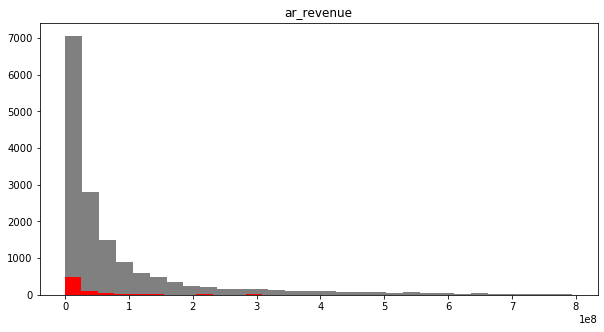

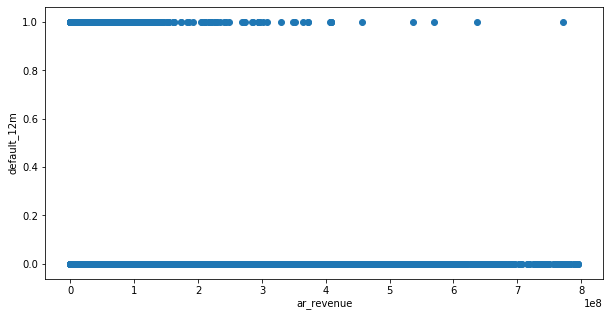

In [25]:
vision_outliers(df_fin_train,'ar_revenue',df_fin_train)
index_todel = df_fin_train.query('ar_revenue > 300000000 and default_12m == 1').index.tolist()
test_remove_outliers = df_fin_train.drop(index_todel,axis =0)

Кол-во дефолтов 758
Кол-во не дефолтов 15599


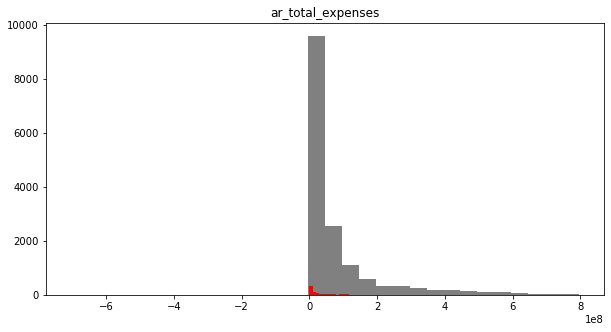

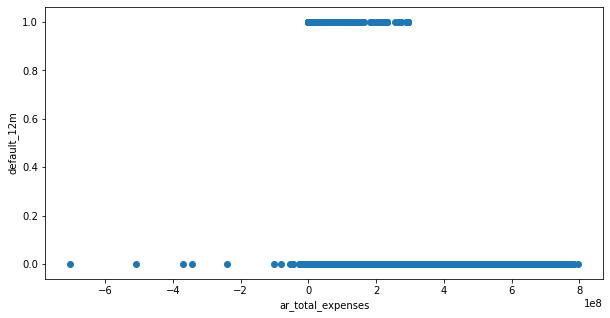

In [26]:
vision_outliers(test_remove_outliers,'ar_total_expenses',test_remove_outliers)
index_todel = test_remove_outliers.query('ar_total_expenses < 0').index.tolist()
test_remove_outliers = test_remove_outliers.drop(index_todel,axis =0)

Кол-во дефолтов 758
Кол-во не дефолтов 15582


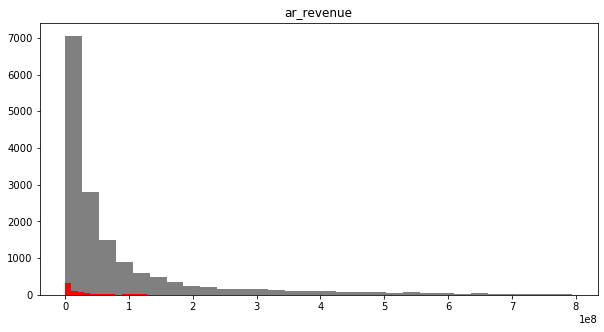

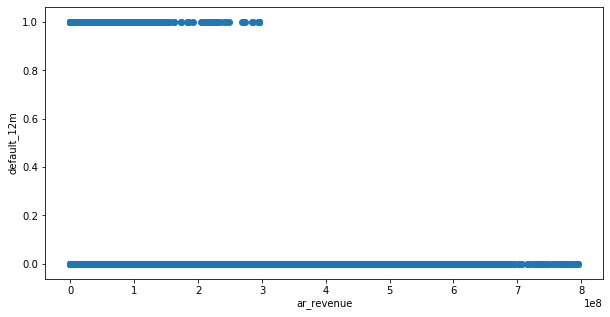

In [27]:
vision_outliers(test_remove_outliers,'ar_revenue',test_remove_outliers)

Кол-во дефолтов 758
Кол-во не дефолтов 15582


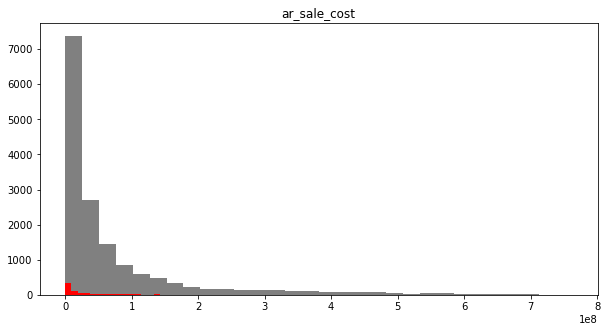

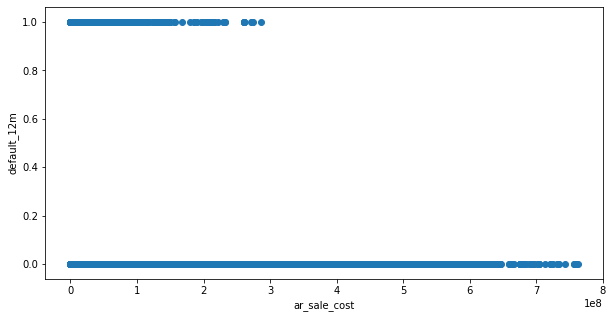

In [28]:
vision_outliers(test_remove_outliers,'ar_sale_cost',test_remove_outliers)

Кол-во дефолтов 758
Кол-во не дефолтов 15582


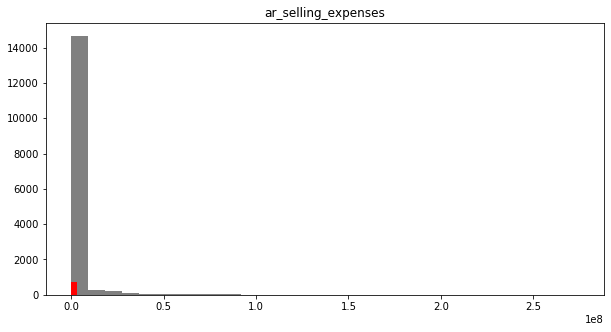

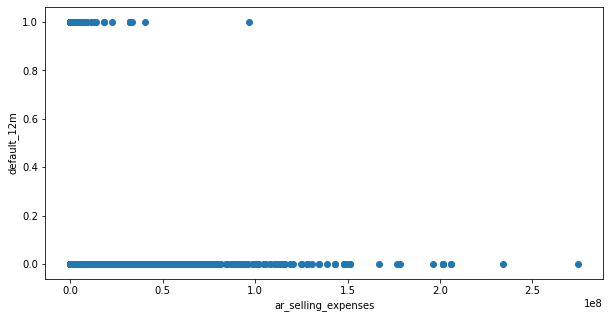

[9619, 10181, 11736, 13435, 14069, 18658, 24938, 27643, 28253, 28427, 30498, 281, 2186, 2589, 3688, 7325, 8610, 8797, 11045, 12302, 14340, 15470, 15520, 17041, 18661, 20413, 21461, 21643, 21670, 21915, 22469, 23471, 23646, 25625, 25666, 25854, 28957, 30633, 31220, 31758, 31988]


In [29]:
vision_outliers(test_remove_outliers,'ar_selling_expenses',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('ar_selling_expenses > 18000000 and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('ar_selling_expenses > 120000000 and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 747
Кол-во не дефолтов 15552


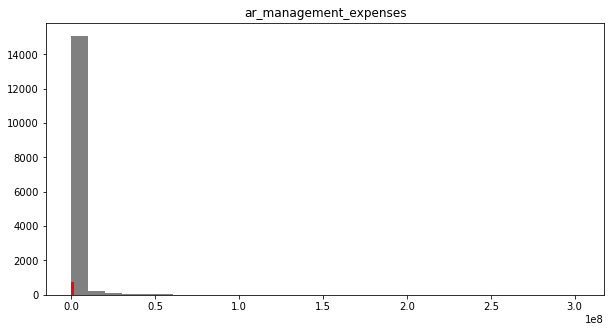

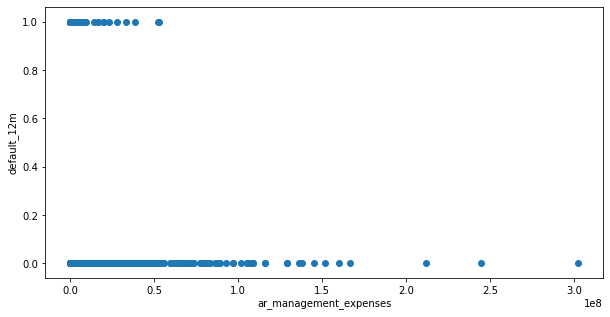

[957, 6095, 9507, 12215, 18729, 19095, 23526, 24208, 26471, 30461, 31661, 1390, 1765, 4023, 5192, 5600, 6232, 6527, 8927, 12827, 14192, 14591, 14685, 15482, 16615, 16947, 27030, 28110, 28765, 29438, 29871, 30972, 31297]


In [30]:
vision_outliers(test_remove_outliers,'ar_management_expenses',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('ar_management_expenses > 14000000 and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('ar_management_expenses > 90000000 and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 736
Кол-во не дефолтов 15530


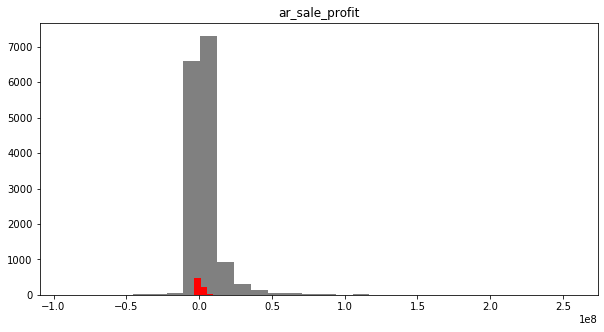

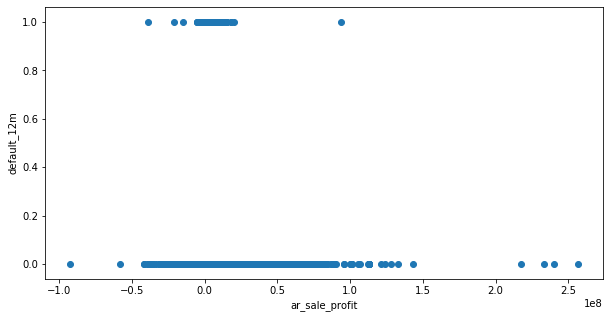

[6534, 15191, 16940, 26060, 215, 1164, 2588, 4444, 6304, 6460, 8626, 9757, 9767, 10537, 10865, 10997, 11024, 11507, 13063, 13145, 13432, 13654, 15970, 16287, 16427, 16919, 19649, 20936, 26140, 26861, 26927, 28490, 29592, 29976, 31503]


In [31]:
vision_outliers(test_remove_outliers,'ar_sale_profit',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_sale_profit < -12000000 or ar_sale_profit > 25000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_sale_profit < -40000000 or ar_sale_profit > 95000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 732
Кол-во не дефолтов 15499


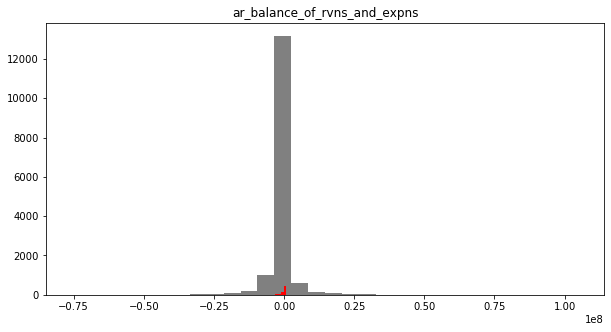

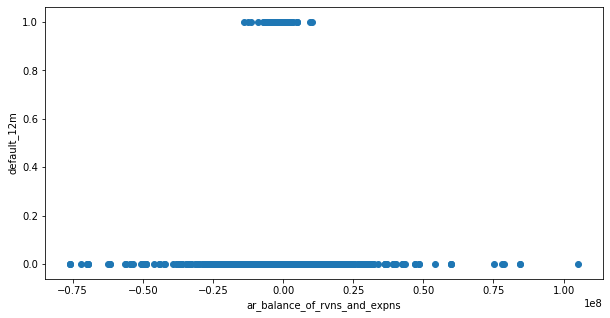

[7529, 8745, 20499, 23223, 23613, 1935, 2105, 2132, 3015, 3020, 3391, 3608, 3725, 3902, 3946, 4108, 4227, 5078, 5166, 7956, 8337, 8658, 8719, 9120, 9162, 12345, 12821, 14288, 14523, 14665, 15537, 15785, 16465, 16713, 16861, 17054, 17521, 17587, 17866, 18414, 18624, 18905, 19012, 21738, 26433, 27177, 27859, 28404, 28729, 28892, 29347, 29567, 29754, 29831, 30479, 31502, 31815]


In [32]:
vision_outliers(test_remove_outliers,'ar_balance_of_rvns_and_expns',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_balance_of_rvns_and_expns < -10000000 or ar_balance_of_rvns_and_expns > 5000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_balance_of_rvns_and_expns < -40000000 or ar_balance_of_rvns_and_expns > 38000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 727
Кол-во не дефолтов 15447


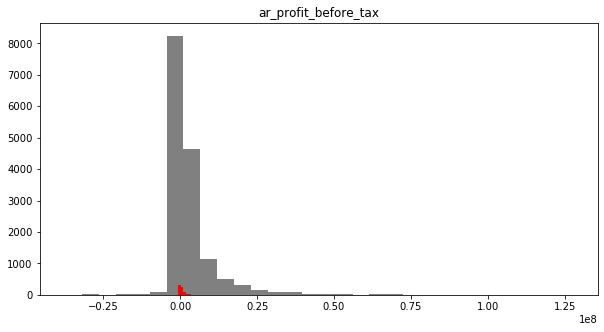

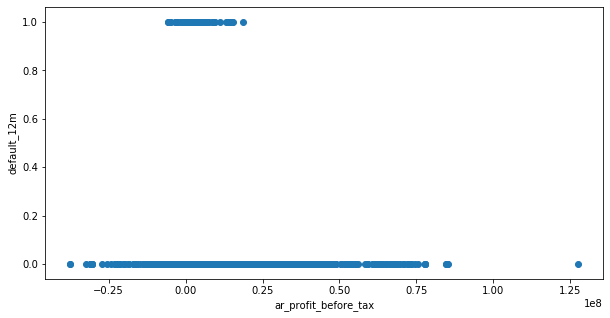

[1897, 6390, 9583, 12366, 17634, 20992, 26808, 29553, 31844]


In [33]:
vision_outliers(test_remove_outliers,'ar_profit_before_tax',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_profit_before_tax < -10000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_profit_before_tax < -32000000 or ar_profit_before_tax > 80000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 727
Кол-во не дефолтов 15438


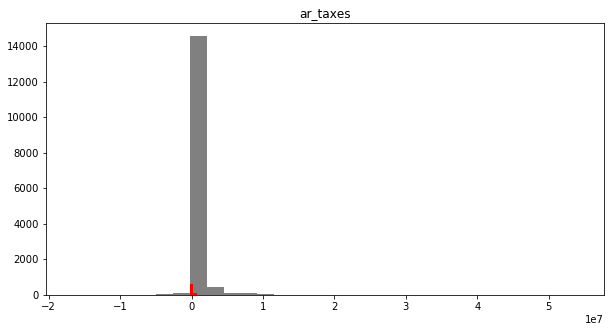

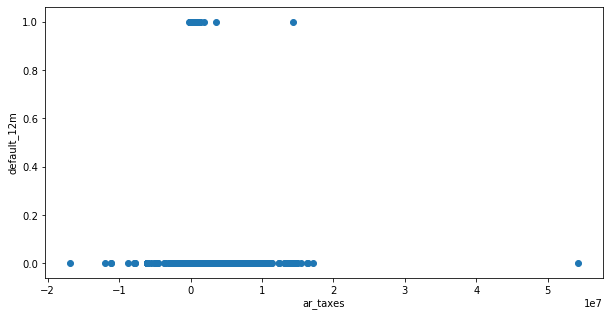

[9596, 25885, 1376, 1828, 2230, 2980, 3314, 3317, 3559, 4554, 5322, 5670, 5893, 7416, 7996, 8453, 8501, 8725, 8966, 8994, 9890, 11227, 12661, 12924, 13172, 14045, 15415, 15481, 15667, 17889, 17941, 18173, 19384, 19604, 22125, 22579, 23099, 23666, 24472, 25660, 25735, 26741, 27708, 27729, 28258, 28722, 28789, 28834, 28888, 28944, 29530, 29853, 31141, 31287, 32142, 32265]


In [34]:
vision_outliers(test_remove_outliers,'ar_taxes',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_taxes > 2000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_taxes < -4000000 or ar_taxes > 13000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def+index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 725
Кол-во не дефолтов 15384


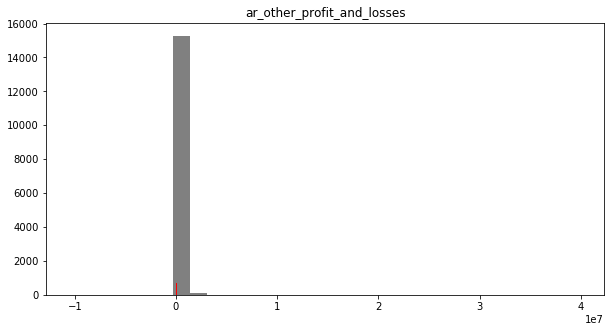

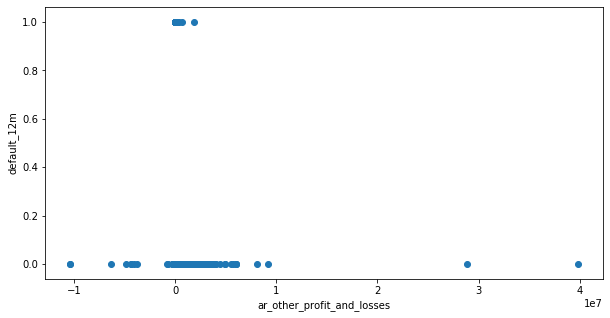

[18270, 20981, 24545, 1382, 2320, 2902, 3444, 4188, 5030, 7009, 7070, 8338, 8765, 9979, 10217, 11121, 11680, 11814, 12261, 13915, 14767, 15277, 15830, 16829, 16905, 17721, 18951, 21403, 22423, 22694, 22822, 24467, 24558, 26292, 27106, 27399, 28721, 29954, 29967, 30419, 30962, 31628]


In [35]:
vision_outliers(test_remove_outliers,'ar_other_profit_and_losses',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_other_profit_and_losses > 300000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_other_profit_and_losses < -500000 or ar_other_profit_and_losses > 3000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 722
Кол-во не дефолтов 15345


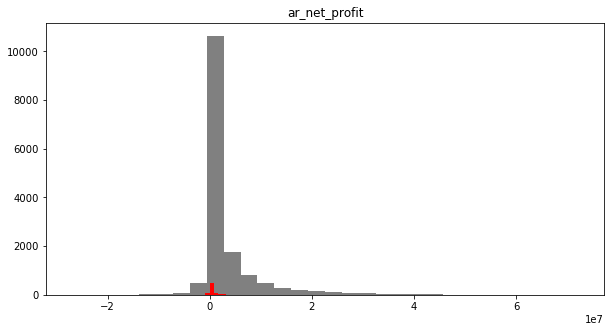

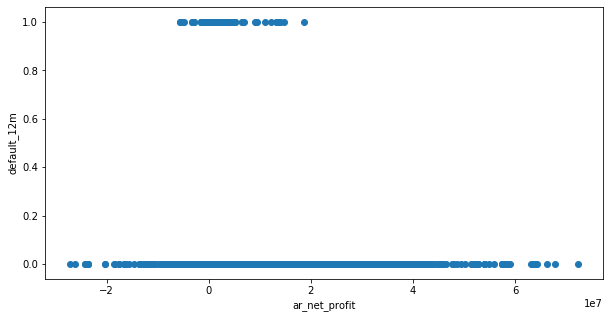

[2874, 8998, 1478, 7066, 8913, 17917, 18164, 19952, 24645, 30097]


In [36]:
vision_outliers(test_remove_outliers,'ar_net_profit',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ar_net_profit > 14000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ar_net_profit < -21000000 or ar_net_profit > 70000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 720
Кол-во не дефолтов 15337


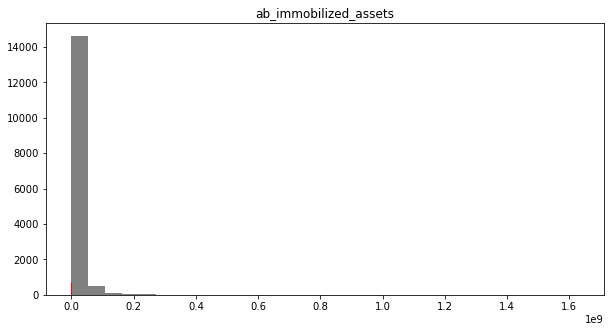

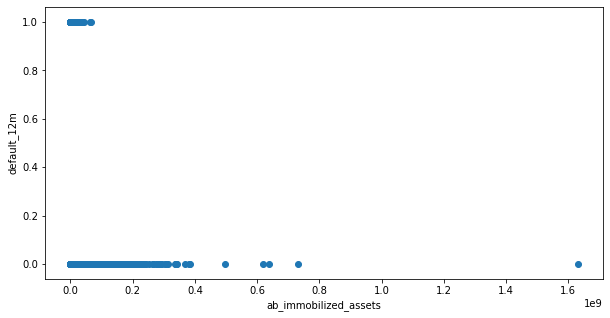

[3814, 6836, 63, 1256, 1345, 2240, 2302, 4104, 5930, 5992, 6615, 7855, 13074, 15610, 18781, 18871, 22493, 23285, 24386, 24763, 26338, 28564, 29933, 31101, 31525, 31779]


In [37]:
vision_outliers(test_remove_outliers,'ab_immobilized_assets',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_immobilized_assets > 50000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_immobilized_assets > 250000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 718
Кол-во не дефолтов 15313


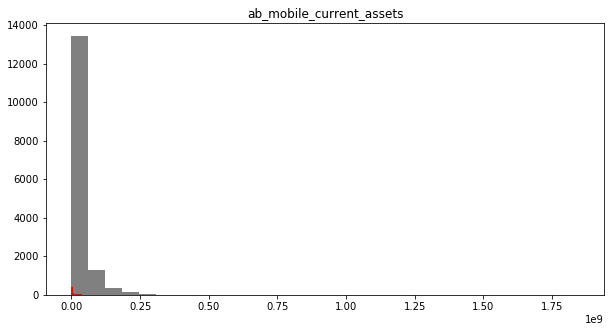

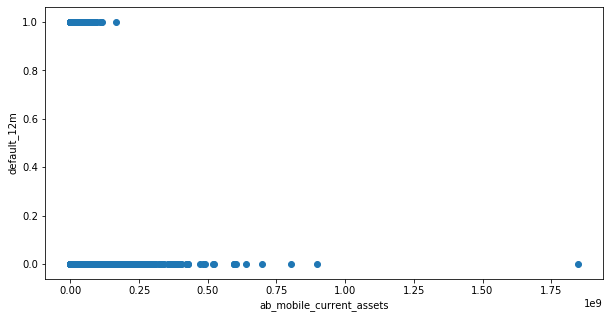

[1784, 17420, 24857, 26859, 637, 741, 1271, 1343, 3270, 5198, 5706, 6542, 7113, 7775, 7823, 8074, 8637, 8853, 9053, 10051, 11082, 11967, 12123, 13816, 15113, 16071, 18530, 19217, 20099, 23426, 26993, 28817, 28856, 31936, 32311, 32357]


In [38]:
vision_outliers(test_remove_outliers,'ab_mobile_current_assets',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_mobile_current_assets > 100000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_mobile_current_assets > 350000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 714
Кол-во не дефолтов 15281


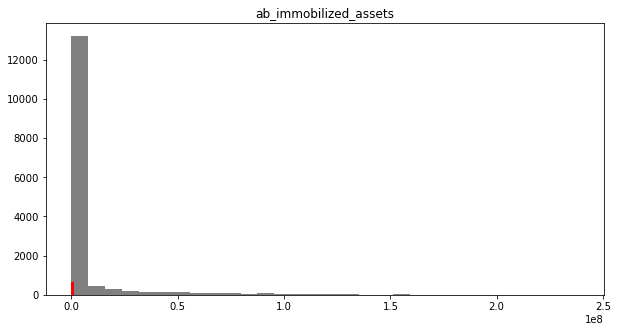

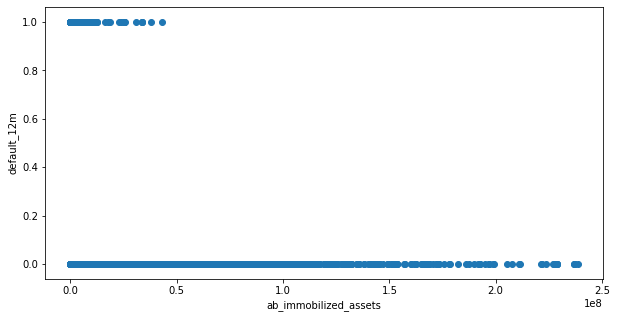

[9867, 22099, 23059, 23240, 28351, 32083, 657, 1191, 1279, 3383, 3438, 5463, 10425, 14586, 15298, 17015, 20371, 22901, 23450, 23549, 24860, 28387, 29543]


In [39]:
vision_outliers(test_remove_outliers,'ab_immobilized_assets',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_immobilized_assets > 30000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_immobilized_assets > 200000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 708
Кол-во не дефолтов 15264


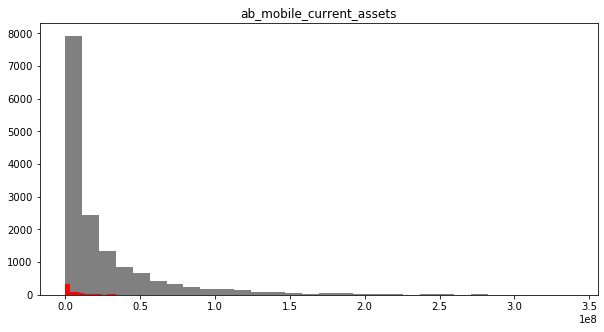

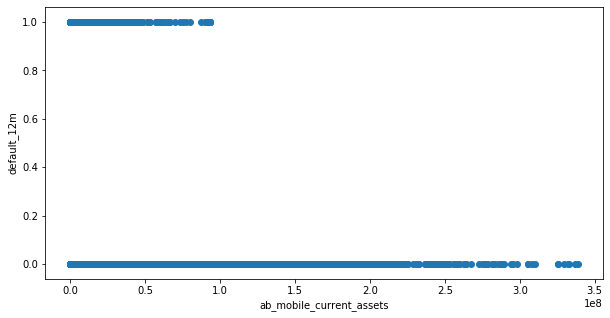

[19642, 19677, 20839, 22478, 25865, 26598, 27355]


In [40]:
vision_outliers(test_remove_outliers,'ab_mobile_current_assets',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_mobile_current_assets > 120000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_mobile_current_assets > 310000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 708
Кол-во не дефолтов 15257


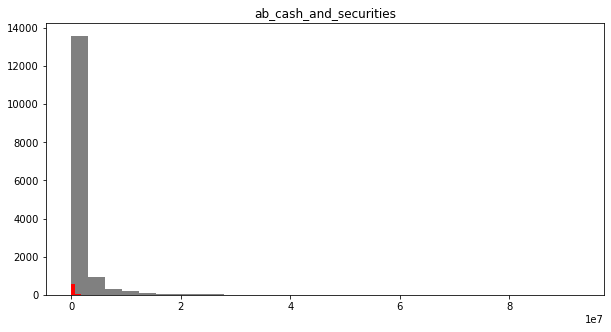

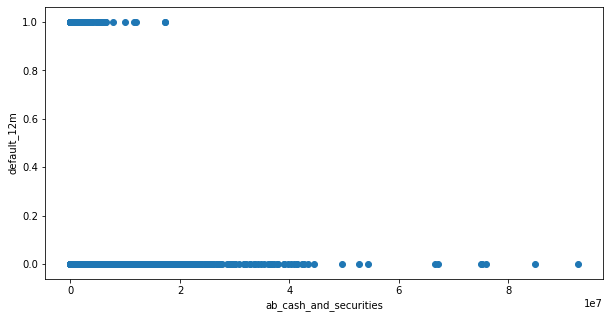

[10479, 13002, 22008, 27512, 29482, 31354, 2976, 8301, 9052, 12489, 14234, 16220, 20474, 26319, 30045, 30680]


In [41]:
vision_outliers(test_remove_outliers,'ab_cash_and_securities',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def = test_remove_outliers.query('(ab_cash_and_securities > 7000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_cash_and_securities > 46000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 702
Кол-во не дефолтов 15247


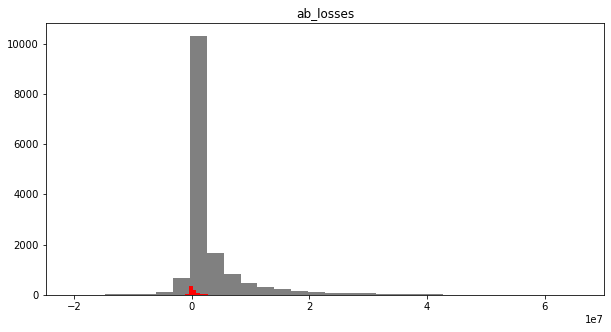

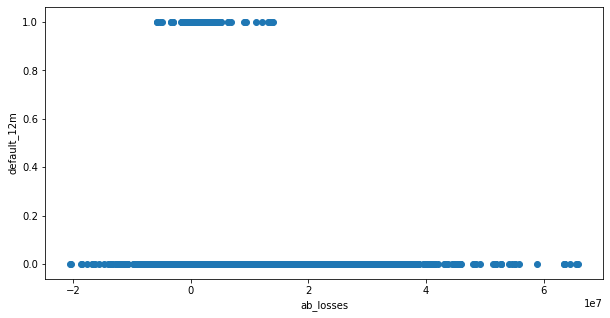

[2087, 5245, 6000, 6403, 10508, 12279, 17395, 24705, 30631, 1334, 3266, 4849, 5614, 6716, 7261, 7972, 13259, 15204, 17077, 19048, 20361, 20613, 22178, 25121, 25584, 26243, 27866, 30715]


In [42]:
vision_outliers(test_remove_outliers,'ab_losses',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_losses > 8000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_losses > 50000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 693
Кол-во не дефолтов 15228


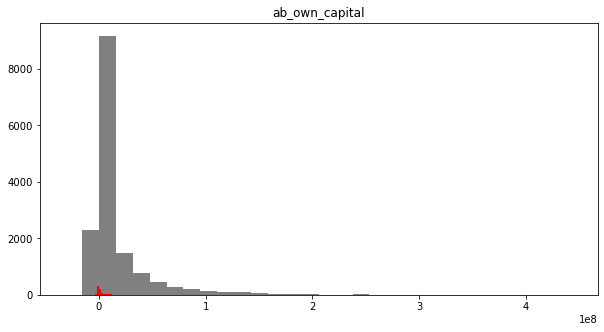

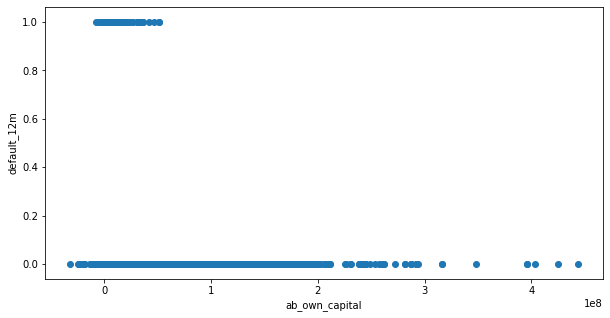

[31544, 32379, 167, 1187, 1728, 3373, 5197, 5887, 5949, 6575, 7208, 9312, 10838, 11016, 13121, 13701, 14071, 14468, 14519, 15239, 15615, 16112, 16733, 17148, 17623, 18800, 18988, 20215, 20870, 21715, 22045, 23216, 26249, 26923, 27477, 27639, 29102, 29205, 29778, 29946, 30832, 31214, 31537, 32194]


In [43]:
vision_outliers(test_remove_outliers,'ab_own_capital',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_own_capital> 47000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_own_capital < -50000000 or ab_own_capital > 210000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 691
Кол-во не дефолтов 15186


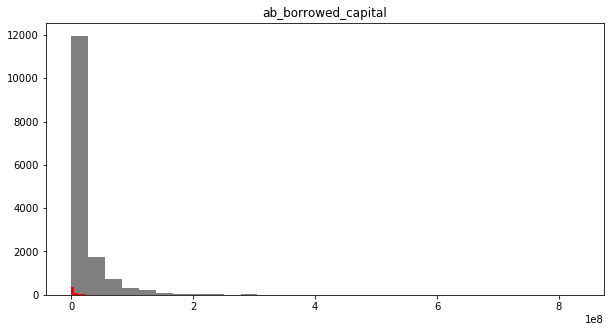

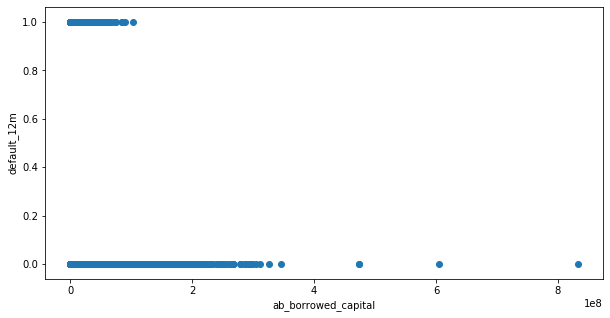

[15311, 16130, 16899, 19329, 21318, 1429, 1972, 5385, 11270, 11364, 12673, 13653, 16454, 19235, 19371, 20298, 24569, 25046, 25937, 30064, 30171, 30897, 32137]


In [44]:
vision_outliers(test_remove_outliers,'ab_borrowed_capital',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_borrowed_capital > 80000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_borrowed_capital > 280000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 686
Кол-во не дефолтов 15168


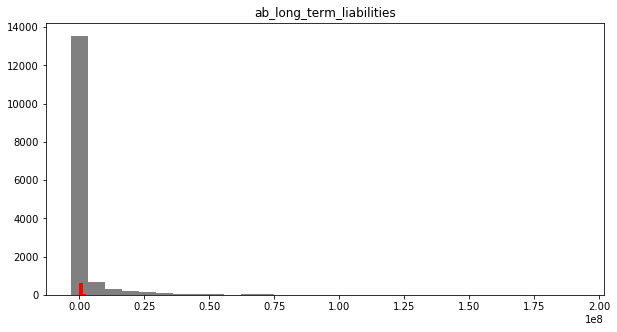

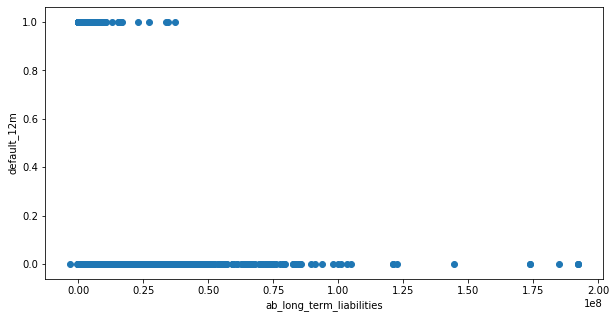

[694, 3520, 3789, 10513, 11175, 17713, 23545, 26053, 28083, 29452, 29758, 163, 462, 1414, 1488, 3481, 4221, 7661, 11104, 11181, 12216, 14459, 17960, 18169, 18884, 19623, 19684, 19882, 20132, 21588, 22033, 22473, 27169, 30742, 31089, 31443]


In [45]:
vision_outliers(test_remove_outliers,'ab_long_term_liabilities',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_long_term_liabilities > 12000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_long_term_liabilities > 80000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 675
Кол-во не дефолтов 15143


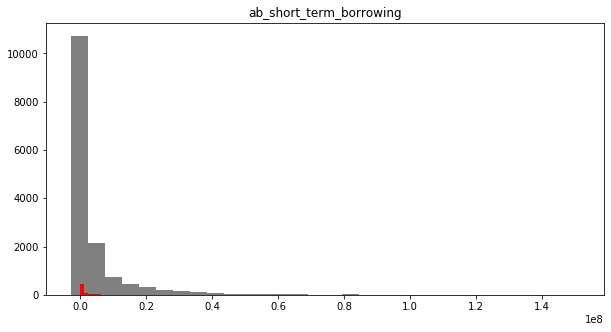

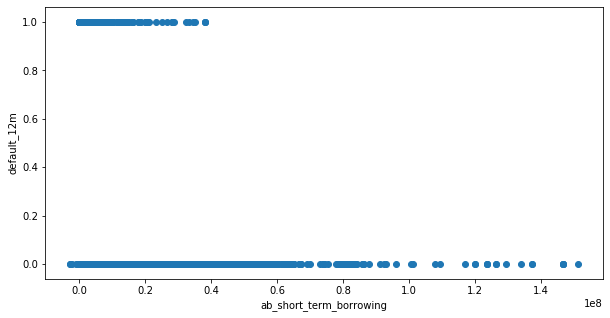

[4626, 12470, 14274, 15698, 16877, 24829, 28501, 2406, 2538, 4697, 4907, 5360, 6713, 8832, 10793, 11712, 13109, 13954, 18626, 19092, 20619, 21191, 23617, 28059, 30469, 30537, 31647, 32172]


In [46]:
vision_outliers(test_remove_outliers,'ab_short_term_borrowing',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_short_term_borrowing > 30000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_short_term_borrowing > 100000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 668
Кол-во не дефолтов 15122


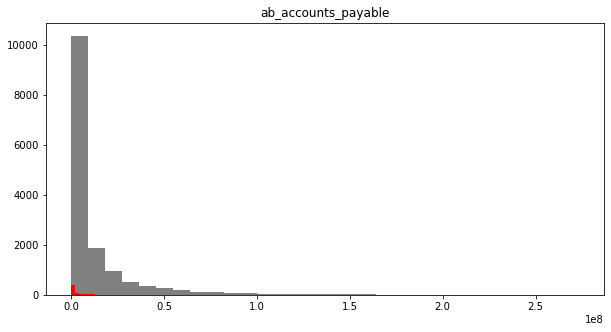

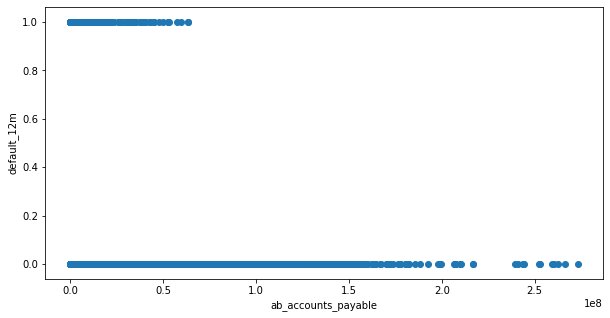

[12936, 21253, 44, 1548, 1607, 4748, 4977, 5407, 6601, 9652, 10331, 10382, 12385, 12481, 14846, 16789, 16798, 17626, 18332, 19559, 19597, 24159, 25640, 28675, 29338, 30935, 32386]


In [47]:
vision_outliers(test_remove_outliers,'ab_accounts_payable',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_accounts_payable > 60000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_accounts_payable > 200000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 666
Кол-во не дефолтов 15097


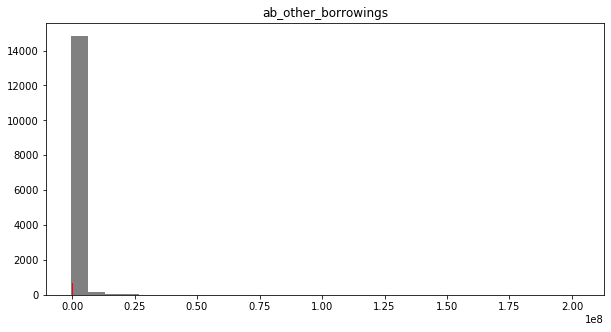

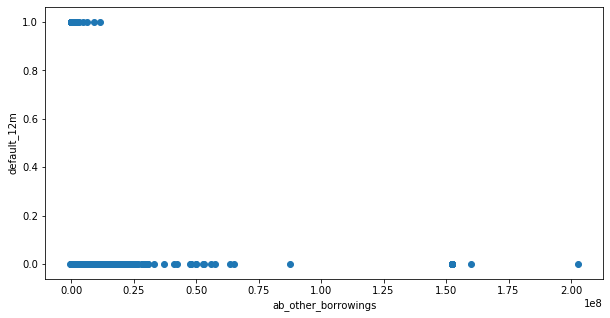

[1610, 6109, 16565, 16595, 17688, 22799, 942, 1099, 1230, 1270, 1447, 1864, 1893, 2107, 2208, 2412, 3713, 3759, 3888, 3903, 4081, 4344, 4423, 4598, 5611, 5794, 6573, 6792, 7200, 7523, 10512, 10899, 11071, 11396, 11405, 12260, 12291, 12569, 12849, 12890, 13173, 13211, 13610, 13622, 13650, 13852, 13948, 14178, 14526, 14565, 15738, 16448, 16456, 16593, 17013, 17048, 18371, 19007, 19044, 19122, 19297, 19577, 19858, 20631, 22510, 22584, 22954, 22959, 23077, 23166, 23793, 24119, 24196, 24319, 24711, 25320, 26105, 26142, 26215, 26231, 26634, 26686, 27049, 27244, 27436, 28267, 28302, 28801, 29228, 29291, 29859, 29913, 29997, 30163, 30199, 31156, 32146, 32269]


In [48]:
vision_outliers(test_remove_outliers,'ab_other_borrowings',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_other_borrowings > 2000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_other_borrowings > 14000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

Кол-во дефолтов 660
Кол-во не дефолтов 15005


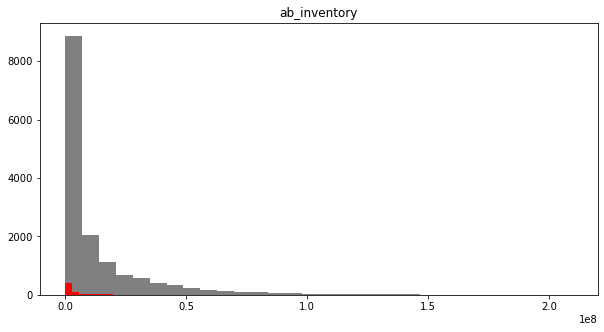

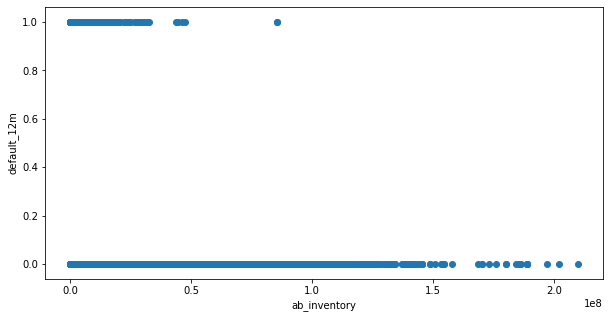

[632, 1369, 13021, 20314, 27218, 32358, 323, 591, 2305, 4095, 4105, 4179, 4286, 5539, 5748, 7923, 7989, 8410, 9569, 12320, 13949, 15668, 16500, 17974, 22577, 24415, 25159, 25201, 28119, 28816]


In [49]:
vision_outliers(test_remove_outliers,'ab_inventory',test_remove_outliers)#.query('ar_revenue > 300000000')
index_todel_def =  test_remove_outliers.query('(ab_inventory > 40000000) and default_12m == 1').index.tolist()
index_todel_nondef = test_remove_outliers.query('(ab_inventory > 150000000) and default_12m == 0').index.tolist()
print(index_todel_def+index_todel_nondef)
test_remove_outliers = test_remove_outliers.drop(index_todel_def + index_todel_nondef,axis =0)
del index_todel_def
del index_todel_nondef

In [50]:
df_fin_train = test_remove_outliers.copy()

#### Выбросы выборки без фин данных

In [51]:
df_no_fin_train.shape

(10215, 11)

In [52]:
# Q1 = df_no_fin_train.quantile(0.25)
# Q3 = df_no_fin_train.quantile(0.75)

# IQR = Q3 - Q1
# train_df_outliers = df_no_fin_train[(~((df_no_fin_train < (Q1 - 3 * IQR)) |(df_no_fin_train > (Q3 + 3 * IQR))).any(axis=1))]

In [53]:
# train_df_outliers.shape[0]

In [54]:
# df_no_fin_train = train_df_outliers.copy()

## Feature Engineering

[ТУТ ВСТАВИТЬ ОПИСАНИЕ ВСЕХ ПРИЗНАКОВ]


In [55]:
def make_features(df):
    frame = df.copy()
    # Доля дохода, которая учитывает пост-оплату
    frame['frac_post_pay'] = frame['ab_accounts_receivable']/frame['ar_revenue']
    frame['OPEX'] = frame['ar_total_expenses'] - frame['ar_selling_expenses'] - frame["ar_management_expenses"]
    # ДОля операционных расходов
    frame['OER'] = frame['OPEX']/frame['ar_revenue']
    frame['frac_comer_exp'] = frame['ar_selling_expenses' ]/ frame['ar_total_expenses']
    frame['Net_margin'] = frame['ar_net_profit']/frame['ar_revenue']
    frame['gross_profit_margin'] = (frame['ar_revenue'] - frame['ar_sale_cost'])/frame['ar_revenue']
    frame['OP_Margin'] = frame['OPEX']/frame['ar_revenue']
    frame['ROE'] = frame['ar_net_profit']/frame['ab_own_capital']
    frame['ROA'] = frame['ar_net_profit']/(frame['ab_own_capital'] + frame['ab_borrowed_capital'])
    frame['Debt/EBIT'] = (frame['ab_long_term_liabilities'] + frame['ab_other_borrowings'] + frame['ab_short_term_borrowing'])/frame['ar_profit_before_tax']
    frame['Debt_ratio'] = (frame['ab_long_term_liabilities'] + frame['ab_other_borrowings'] + frame['ab_short_term_borrowing'])/(frame['ab_own_capital'] + frame['ab_borrowed_capital'])
    frame['tax_ratio'] = frame['ar_taxes']/frame['ar_profit_before_tax']
    frame['time_gap'] = frame['ab_accounts_payable']/(frame['ab_cash_and_securities']+frame['ab_accounts_receivable'])
    frame['borrowing_balance'] = frame['ab_accounts_receivable']/frame['ab_accounts_payable']
    frame['Debt/Equity'] = (frame['ab_long_term_liabilities'] + frame['ab_other_borrowings'] + frame['ab_short_term_borrowing'])/frame['ab_own_capital']
    frame['current_ratio'] = (frame['ab_mobile_current_assets']+frame['ab_other_current_assets'])/(frame['ab_short_term_borrowing']+frame['ab_other_borrowings'])
    frame['cash_ratio'] = frame['ab_cash_and_securities']/frame['ab_short_term_borrowing']
    frame['fast_pay'] = (frame['ab_cash_and_securities']+frame['ab_accounts_receivable'])/(frame['ab_own_capital'] + frame['ab_borrowed_capital'])
    frame['tumover_ratio'] = frame['ar_revenue']/(frame['ab_own_capital'] + frame['ab_borrowed_capital'])
    return frame

Создаем признаки только для выборок с финансовой отчетностью:

In [56]:
df_fin_train_feature = make_features(df_fin_train)
df_fin_test_feature = make_features(df_fin_test)

Теперь же очистим наши выборки от ненужных столбцов. Для _part_2 это все абсолютные значения финансовых показателей. А для _part_1 это все переменные отвечающие за финансовую отчетность + ul_strategic_flg

Уберем старые признаки:


*   Для выборок с фин. отчетностью - это абсолютные значения финансовых показателей
*   Для выборок без фин. отчетность - это все столбцы с NaN значениями


In [57]:
fin_abs_features = ['ar_revenue',
                   'ar_other_profit_and_losses',
                   'ar_profit_before_tax', 
                   'ar_taxes', 
                   'ar_total_expenses', 
                   'ar_sale_cost', 
                   'ar_selling_expenses', 
                   'ar_management_expenses',
                   'ar_sale_profit', 
                   'ar_balance_of_rvns_and_expns']

In [58]:
# Выборки с фин отчетностью
df_fin_train_feature_complex = df_fin_train_feature.drop(fin_abs_features, axis = 1)
df_fin_test_feature_complex = df_fin_test_feature.drop(fin_abs_features, axis = 1)

# Выборки без фин отчетности
df_no_fin_train_dropna = df_no_fin_train.dropna(axis=1,how='all')
df_no_fin_test_dropna = df_no_fin_test.dropna(axis=1,how='all')

In [59]:
def find_correlated_features(df_, threshold):
    corr_matrix = df_.corr().abs()
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
    df_ = corr_matrix.stack().reset_index()
    df_.columns = ['feature1', 'feature2', 'corr_coef']
    df_ = df_[df_.corr_coef >= threshold].sort_values('corr_coef', ascending=False)
    return df_

In [60]:
# feature_1 = find_correlated_features(df_fin_train_feature_complex.drop(['adr_actual_age','OP_Margin','gross_profit_margin','OP_Margin',
#                                                                         'head_actual_age','ar_net_profit','ab_borrowed_capital','ab_mobile_current_assets',
#                                                                         'bus_age','frac_post_pay','ab_accounts_payable','tax_ratio','ab_own_capital','tumover_ratio','ab_accounts_receivable'],axis = 1), 0.6)['feature1'].value_counts().to_frame().reset_index()
# feature_2 = find_correlated_features(df_fin_train_feature_complex.drop(['adr_actual_age','OP_Margin','gross_profit_margin','OP_Margin',
#                                                                         'head_actual_age','ar_net_profit','ab_borrowed_capital','ab_mobile_current_assets',
#                                                                         'bus_age','frac_post_pay','ab_accounts_payable','tax_ratio','ab_own_capital','tumover_ratio','ab_accounts_receivable'],axis = 1), 0.6)['feature2'].value_counts().to_frame().reset_index()
# feature_3 = feature_1.merge(feature_2, on = 'index',how = 'outer').fillna(0)
# feature_3['sum'] = feature_3['feature1'] + feature_3['feature2']
# feature_3

In [61]:
# find_correlated_features(df_fin_train_feature_complex.drop(['adr_actual_age','OP_Margin','gross_profit_margin','OP_Margin',
#                                                             'head_actual_age','ar_net_profit','ab_borrowed_capital','ab_mobile_current_assets',
#                                                             'bus_age','frac_post_pay','ab_accounts_payable','tax_ratio','ab_own_capital','tumover_ratio','ab_accounts_receivable','ab_immobilized_assets'],axis = 1), 0.6)

In [62]:
corr_columns_to_del_fin = ['adr_actual_age','OP_Margin','gross_profit_margin','OP_Margin',
                                                            'head_actual_age','ar_net_profit','ab_borrowed_capital','ab_mobile_current_assets',
                                                            'bus_age','frac_post_pay','ab_accounts_payable','tax_ratio','ab_own_capital','tumover_ratio','ab_accounts_receivable','ab_immobilized_assets']

Посмотрим на новые признаки у выборок с финансовой отчетностью:

In [63]:
df_fin_train_feature_complex.head(10)

,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,default_12m,frac_post_pay,OPEX,OER,frac_comer_exp,Net_margin,gross_profit_margin,OP_Margin,ROE,ROA,Debt/EBIT,Debt_ratio,tax_ratio,time_gap,borrowing_balance,Debt/Equity,current_ratio,cash_ratio,fast_pay,tumover_ratio
0,1198000.0,0.0,7240000.0,4988000.0,2252000.0,0.0,255000.0,1198000.0,663000.0,15872000.0,0.0,11349000.0,4523000.0,0.0,198,136,3,3,3,2,50000.0,2,0,0,0,0.042494,48344000.0,0.912220,0.000000,0.022605,0.087780,0.912220,1.806938,0.072452,5.552348,0.686362,0.413894,1.804148,0.497900,17.117647,0.637942,0.022469,0.151618,3.205080
3,1919000.0,0.0,4245000.0,4082000.0,163000.0,0.0,25000.0,1919000.0,2219000.0,3652000.0,0.0,3652000.0,0.0,0.0,185,139,8,8,8,2,300000.0,1,0,0,0,0.005086,29568000.0,0.922587,0.000000,0.059877,0.077413,0.922587,0.864804,0.326861,1.644304,0.622041,0.135975,0.000000,inf,1.645786,1.162377,0.006846,0.032022,5.458866
4,711000.0,0.0,8950000.0,8606000.0,344000.0,0.0,492000.0,711000.0,12439000.0,1279000.0,0.0,0.0,1279000.0,0.0,220,138,27,27,27,2,10000.0,2,0,0,0,0.020902,14935000.0,0.907461,0.000000,0.043201,0.092539,0.907461,0.057159,0.051830,0.000000,0.000000,0.430745,1.529904,0.268960,0.000000,inf,inf,0.060942,1.199738
9,2135000.0,0.0,24680000.0,8263000.0,16417000.0,0.0,106000.0,2135000.0,11267000.0,11912000.0,0.0,13000.0,11899000.0,0.0,170,132,15,15,15,0,10000.0,2,0,0,0,0.130884,122655000.0,0.977861,0.000000,0.017021,0.022139,0.977861,0.189491,0.092109,0.004790,0.000561,0.213338,0.720148,1.379696,0.001154,1898.461538,8.153846,0.712844,5.411450
10,104000.0,0.0,38004000.0,23189000.0,14815000.0,0.0,449000.0,104000.0,10000.0,38443000.0,0.0,4986000.0,33457000.0,0.0,29,29,4,4,4,2,10000.0,2,0,0,0,0.248699,59331000.0,0.995988,0.000000,0.001746,0.004012,0.995988,10.400000,0.002705,35.112676,0.129665,0.267606,2.191889,0.442807,498.600000,7.622142,0.090052,0.396952,1.549164
11,21608000.0,2094000.0,106180000.0,1180000.0,105000000.0,0.0,557000.0,21608000.0,90313000.0,18518000.0,0.0,7500000.0,11018000.0,0.0,102,102,4,4,4,1,300000.0,2,0,0,0,0.582929,142075000.0,0.788758,0.103724,0.119961,0.211242,0.788758,0.239257,0.198546,0.347094,0.068914,0.000000,0.104380,9.529860,0.083045,14.157333,0.074267,0.969917,1.655089
12,71000.0,1269000.0,35349000.0,28034000.0,7237000.0,78000.0,2008000.0,71000.0,94000.0,38532000.0,2866000.0,0.0,35666000.0,0.0,24,24,7,7,7,2,21000.0,1,0,0,0,0.204580,4710000.0,0.133145,0.830635,0.002007,0.866855,0.133145,0.755319,0.001838,32.202247,0.074199,0.202247,3.857869,0.202910,30.489362,inf,inf,0.239347,0.915834
14,855000.0,0.0,11564000.0,8770000.0,2794000.0,0.0,606000.0,855000.0,865000.0,0.0,0.0,0.0,0.0,0.0,20,20,16,16,16,2,10000.0,1,0,0,0,0.120733,22064000.0,0.953418,0.000000,0.036946,0.046582,0.953418,0.988439,0.988439,0.000000,0.000000,0.200187,0.000000,inf,0.000000,inf,inf,3.930636,26.753757
15,157000.0,0.0,3879000.0,1643000.0,2236000.0,0.0,213000.0,157000.0,219000.0,3873000.0,0.0,2387000.0,1486000.0,0.0,48,48,16,16,16,2,10000.0,1,0,0,0,0.138469,15893000.0,0.984209,0.000000,0.009723,0.015791,0.984209,0.716895,0.038368,12.116751,0.583333,0.203046,0.606778,1.504711,10.899543,1.625052,0.089233,0.598485,3.946237
16,0.0,10000.0,0.0,0.0,0.0,0.0,150000.0,0.0,10000.0,150000.0,0.0,150000.0,0.0,0.0,20,20,4,4,4,2,10000.0,1,0,0,0,0.000000,146000.0,0.169767,0.182482,0.000000,0.830233,0.169767,0.000000,0.000000,inf,0.937500,NaN,0.000000,NaN,15.000000,0.000000,1.000000,0.937500,5.375000


Заметим, что в некоторых новых признаках присутствуют значения inf и nan (из-за деления на 0). Заменим их на 0: **(точно?)**

In [64]:
df_fin_train_feature_complex_fillna = df_fin_train_feature_complex.fillna(0)
df_fin_test_feature_complex_fillna = df_fin_test_feature_complex.fillna(0)

df_fin_train_feature_complex_fillna = df_fin_train_feature_complex_fillna.replace(np.inf,0)
df_fin_test_feature_complex_fillna = df_fin_test_feature_complex_fillna.replace(np.inf,0)
df_fin_train_feature_complex_fillna = df_fin_train_feature_complex_fillna.replace(-np.inf,0)
df_fin_test_feature_complex_fillna = df_fin_test_feature_complex_fillna.replace(-np.inf,0)

In [65]:
df_fin_train_feature_complex_fillna = df_fin_train_feature_complex_fillna.drop(corr_columns_to_del_fin,axis =1)
df_fin_test_feature_complex_fillna = df_fin_test_feature_complex_fillna.drop(corr_columns_to_del_fin,axis =1)

In [66]:
corr_columns_to_del_no_fin = ["adr_actual_age",'head_actual_age','bus_age']

In [67]:
df_no_fin_train_dropna = df_no_fin_train_dropna.drop(corr_columns_to_del_no_fin,axis = 1)
df_no_fin_test_dropna = df_no_fin_test_dropna.drop(corr_columns_to_del_no_fin,axis = 1)

In [68]:
df_no_fin_test

,record_id,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg
1,1196,216,138,5,5,5,2,100000.0,1,0,0
6,9178,98,98,28,28,28,0,10000.0,1,0,0
7,13143,43,43,28,28,28,2,10000.0,1,0,0
8,13547,16,16,11,11,11,2,10000.0,1,0,0
9,18483,33,33,2,2,2,2,10000.0,1,0,0
11,22367,196,139,2,2,2,2,1488644.0,2,0,0
14,26923,8,8,9,9,9,2,10000.0,1,0,0
15,27565,75,75,23,23,23,2,200000.0,3,0,0
16,28085,79,79,12,12,12,2,10000.0,2,0,0
19,30403,102,102,26,26,26,2,10000.0,1,0,0


## Отбор признаков

### WOE

In [69]:
def calc_woe_iv(df, feature, target):
    
    vals = list(df[feature].unique())
    count_all = []
    default = []
    non_default = []
    
    for i in vals:
        count_all.append(len(df[df[feature] == i]))
        default.append(len(df[(df[target] == 1) & (df[feature] == i)]))
        non_default.append(len(df[(df[target] == 0) & (df[feature] == i)]))
    
    data = {'value': vals, 'count_all': count_all, 'default': default, 'non_default': non_default}
    df_woe_iv = pd.DataFrame(data)
        
    df_woe_iv['Distr_non_default'] = df_woe_iv['non_default'] / df_woe_iv['non_default'].sum()
    df_woe_iv['Distr_default'] = df_woe_iv['default'] / df_woe_iv['default'].sum()
    name_woe = 'WoE_' + feature
    df_woe_iv[name_woe] = np.log(df_woe_iv['Distr_non_default'] / df_woe_iv['Distr_default'])
    df_woe_iv = df_woe_iv.replace({name_woe: {np.inf: 0, -np.inf: 0}})
    df_woe_iv['IV'] = (df_woe_iv['Distr_non_default'] - df_woe_iv['Distr_default']) * df_woe_iv[name_woe]
    iv = df_woe_iv['IV'].sum()
    
    return df_woe_iv, iv

In [70]:
# пример использования
res_example_woe = calc_woe_iv(df_fin_train_feature_complex_fillna, 'ul_branch_cnt', 'default_12m')[0]
res_example_iv = calc_woe_iv(df_fin_train_feature_complex_fillna, 'ul_branch_cnt', 'default_12m')[1]

In [71]:
res_example_woe

,value,count_all,default,non_default,Distr_non_default,Distr_default,WoE_ul_branch_cnt,IV
0,0,15424,651,14773,0.986116,0.995413,-0.009384,0.000087
1,2,33,0,33,0.002203,0.000000,0.000000,0.000000
2,1,135,3,132,0.008811,0.004587,0.652759,0.002757
3,5,8,0,8,0.000534,0.000000,0.000000,0.000000
4,4,10,0,10,0.000668,0.000000,0.000000,0.000000
5,10,2,0,2,0.000134,0.000000,0.000000,0.000000
6,3,12,0,12,0.000801,0.000000,0.000000,0.000000
7,8,4,0,4,0.000267,0.000000,0.000000,0.000000
8,6,6,0,6,0.000401,0.000000,0.000000,0.000000
9,17,1,0,1,0.000067,0.000000,0.000000,0.000000


In [72]:
print('IV for the feature ul_branch_cnt: {}'.format(res_example_iv))

IV for the feature ul_branch_cnt: 0.0028444994692293207


In [73]:
number_bins = range(1, 20)
ivvv = []

for feature in df_fin_train_feature_complex_fillna.columns:
    
    if feature == 'default_12m':
        continue
        
    name = 'cut_' + str(feature)
    for i in number_bins:
        df_fin_train_feature_complex_fillna[name] = pd.cut(df_fin_train_feature_complex_fillna[feature], i)
        ivvv.append(calc_woe_iv(df_fin_train_feature_complex_fillna, name, 'default_12m')[1])

    bin_iv = {}
    for A, B in zip(number_bins, ivvv):
        bin_iv[A] = B
    cut_bin = max(bin_iv, key=bin_iv.get)
    

    df_fin_train_feature_complex_fillna[name] = pd.cut(df_fin_train_feature_complex_fillna[feature], cut_bin)
    del df_fin_train_feature_complex_fillna[feature]

In [74]:
def calc_iv_features(df, target):
    ivs = []
    feature_names = df.columns
    for i in feature_names:
        df_woe_iv = calc_woe_iv(df, i, target)[0]
        ivs.append(df_woe_iv['IV'].sum())
    
    data = {'feature_name': feature_names, 'iv': ivs}
    df_iv = pd.DataFrame(data)
    return df_iv

In [75]:
res_feature_iv = calc_iv_features(df_fin_train_feature_complex_fillna, 'default_12m')

In [76]:
res_feature_iv[res_feature_iv['iv'] > 0.1]

,feature_name,iv
1,cut_ab_inventory,0.238411
4,cut_ab_losses,0.246801
8,cut_ogrn_age,0.287258
10,cut_ul_staff_range,0.166842
15,cut_OPEX,0.131775


In [77]:
feat_iv = list(res_feature_iv[res_feature_iv['iv'] >= 0.1]['feature_name']) + ['default_12m']

In [78]:
df_fin_train_feature_complex_fillna_iv = df_fin_train_feature_complex_fillna[feat_iv]

In [79]:
train_feat_iv = ['WoE_'+label for label in feat_iv[:-1]]+['default_12m']

In [80]:
for feature in df_fin_train_feature_complex_fillna_iv:
    if feature == 'default_12m':
        continue
    temp = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, feature, 'default_12m')[0]
    res = df_fin_train_feature_complex_fillna_iv.merge(temp, how='left', left_on=feature, right_on = 'value')
    del res['value']
    df_fin_train_feature_complex_fillna_iv = res.copy()

df_fin_train_feature_complex_fillna_iv_fin = df_fin_train_feature_complex_fillna_iv[train_feat_iv]

In [81]:
# for feature in df_fin_train_feature_complex_fillna_iv:
#     if feature == 'default_12m':
#         continue
#     temp = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, feature, 'default_12m')[0]
#     res = df_fin_train_feature_complex_fillna_iv.merge(temp, how='left', left_on=feature, right_on = 'value')
#     del res['value']
#     df_fin_train_feature_complex_fillna_iv = res.copy()

# df_fin_train_feature_complex_fillna_iv_fin = df_fin_train_feature_complex_fillna_iv[['WoE_cut_ar_net_profit', 'WoE_cut_ab_losses', 
#                                                                       'WoE_cut_ogrn_age', 'WoE_cut_ul_staff_range', 'default_12m']]

In [82]:
df_fin_train_feature_complex_fillna_iv_fin

,WoE_cut_ab_inventory,WoE_cut_ab_losses,WoE_cut_ogrn_age,WoE_cut_ul_staff_range,WoE_cut_OPEX,default_12m
0,-0.266806,-0.20429,0.601743,-0.119351,-0.225421,0
1,-0.266806,-0.20429,0.811838,-0.119351,-0.225421,0
2,-0.266806,-0.20429,0.601743,-0.119351,-0.225421,0
3,-0.266806,-0.20429,0.601743,1.447396,0.773197,0
4,0.631790,-0.20429,-0.625471,-0.119351,0.391604,0
...,...,...,...,...,...,...
15630,-0.266806,-0.20429,0.024317,-0.119351,-0.225421,0
15631,-0.266806,-0.20429,-0.033726,-0.119351,-0.225421,0
15632,-0.266806,-0.20429,0.811838,-0.119351,-0.225421,0
15633,-0.266806,-0.20429,-0.033726,1.447396,0.773197,1


In [83]:
test_feat_iv = [column_name[4:] for column_name in feat_iv[:-1]]

In [84]:
# woe для тестовой выборки 

df_fin_test_feature_complex_fillna = df_fin_test_feature_complex_fillna[test_feat_iv]



In [85]:
# # woe для тестовой выборки 
# df_fin_test_feature_complex_fillna = df_fin_test_feature_complex_fillna[['ab_losses', 'ar_net_profit', 
#                                                                         'ul_staff_range', 'ogrn_age']]


In [86]:
final_test = pd.DataFrame()
for cut_label,label in zip(feat_iv,test_feat_iv):
    ab_losses_woe = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, cut_label, 'default_12m')[0]
    ab_losses_arr = list(ab_losses_woe['value'])
    test_bins = pd.DataFrame(pd.cut(df_fin_test_feature_complex_fillna[label], bins = pd.IntervalIndex(ab_losses_arr)))
    test_ab_losses_woe = test_bins.merge(ab_losses_woe, how='left', left_on=label, right_on = 'value')['WoE_'+cut_label]
    test_ab_losses_woe = test_bins.merge(ab_losses_woe, how='left', left_on=label, right_on = 'value')['WoE_'+cut_label]
    final_test = pd.concat([final_test,pd.DataFrame(test_ab_losses_woe)],axis =1)

In [87]:
# # ab_losses
# ab_losses_woe = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, 'cut_ab_losses', 'default_12m')[0]
# ab_losses_arr = list(ab_losses_woe['value'])
# test_bins = pd.DataFrame(pd.cut(df_fin_test_feature_complex_fillna['ab_losses'], bins = pd.IntervalIndex(ab_losses_arr)))
# test_ab_losses_woe = test_bins.merge(ab_losses_woe, how='left', left_on='ab_losses', right_on = 'value')['WoE_cut_ab_losses']
# test_ab_losses_woe = test_bins.merge(ab_losses_woe, how='left', left_on='ab_losses', right_on = 'value')['WoE_cut_ab_losses']

In [88]:
# # ar_net_profit
# ar_net_profit_woe = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, 'cut_ar_net_profit', 'default_12m')[0]
# ar_net_profit_arr = list(ar_net_profit_woe['value'])
# test_bins = pd.DataFrame(pd.cut(df_fin_test_feature_complex_fillna['ar_net_profit'], bins = pd.IntervalIndex(ar_net_profit_arr)))
# test_ar_net_profit_woe = test_bins.merge(ar_net_profit_woe, how='left', left_on='ar_net_profit', right_on = 'value')['WoE_cut_ar_net_profit']
# test_ar_net_profit_woe = test_bins.merge(ar_net_profit_woe, how='left', left_on='ar_net_profit', right_on = 'value')['WoE_cut_ar_net_profit']

In [89]:
# # ul_staff_range
# ul_staff_range_woe = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, 'cut_ul_staff_range', 'default_12m')[0]
# ul_staff_range_arr = list(ul_staff_range_woe['value'])
# test_bins = pd.DataFrame(pd.cut(df_fin_test_feature_complex_fillna['ul_staff_range'], bins = pd.IntervalIndex(ul_staff_range_arr)))
# test_ul_staff_range_woe = test_bins.merge(ul_staff_range_woe, how='left', left_on='ul_staff_range', right_on = 'value')['WoE_cut_ul_staff_range']
# test_ul_staff_range_woe = test_bins.merge(ul_staff_range_woe, how='left', left_on='ul_staff_range', right_on = 'value')['WoE_cut_ul_staff_range']

In [90]:
# # ogrn_age
# ogrn_age_woe = calc_woe_iv(df_fin_train_feature_complex_fillna_iv, 'cut_ogrn_age', 'default_12m')[0]
# ogrn_age_arr = list(ogrn_age_woe['value'])
# test_bins = pd.DataFrame(pd.cut(df_fin_test_feature_complex_fillna['ogrn_age'], bins = pd.IntervalIndex(ogrn_age_arr)))
# test_ogrn_age_woe = test_bins.merge(ogrn_age_woe, how='left', left_on='ogrn_age', right_on = 'value')['WoE_cut_ogrn_age']
# test_ogrn_age_woe = test_bins.merge(ogrn_age_woe, how='left', left_on='ogrn_age', right_on = 'value')['WoE_cut_ogrn_age']

In [91]:
# final_test = pd.concat([pd.DataFrame(test_ogrn_age_woe), pd.DataFrame(test_ul_staff_range_woe),
#          pd.DataFrame(test_ar_net_profit_woe), pd.DataFrame(test_ab_losses_woe)],axis = 1)

In [92]:
#df_no_fin_test #= df_no_fin_test.drop('record_id',axis = 1)


In [93]:
# нужно произвести заново деление по woe признакам

X_train_fin = df_fin_train_feature_complex_fillna_iv_fin.drop('default_12m', axis = 1) 
y_train_fin = df_fin_train_feature_complex_fillna_iv_fin['default_12m']

X_train_no_fin = df_no_fin_train_dropna.drop('default_12m',axis = 1) 
y_train_no_fin = df_no_fin_train_dropna['default_12m']


## Модель

[ДОБАВИТЬ БУКОВ]

In [94]:
steps = [
         ('smote',SMOTE(random_state=42)),
         ('stand',StandardScaler()), 
         ('model', LogisticRegression(max_iter=1000))
         ]

LGREG = Pipeline(steps=steps)

# Зададим диапазон перебора параметра
parametrs_logreg = {'model__C': np.logspace(0.5, -5, 10),
                    'smote__k_neighbors': range(2, 12)}

# parametrs_Logreg = {'model__C':[0.0006951927961775605],'smote__k_neighbors':[9]}


# Инициализируем кросс-валидационный перебор параметра
grid_logreg_no_fin = GridSearchCV(LGREG,
                                  parametrs_logreg,
                                  scoring='accuracy'
                                  )

# Обучим модель
grid_logreg_no_fin.fit(X_train_no_fin,
                       y_train_no_fin)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('stand', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'model__C': array([3.16227766e+00, 7.74263683e-01, 1.89573565e-01, 4.64158883e-02,
       1.13646367e-02, 2.78255940e-03, 6.81292069e-04, 1.66810054e-04,
       4.08423865e-05, 1.00000000e-05]),
                         'smote__k_neighbors': range(2, 12)},
             scoring='accuracy')

In [95]:
grid_logreg_no_fin.best_score_

0.62496328928047

In [96]:
grid_logreg_no_fin.best_params_

{'model__C': 3.1622776601683795, 'smote__k_neighbors': 4}

In [97]:
y_train_no_fin.value_counts(normalize=True)

0    0.897699
1    0.102301
Name: default_12m, dtype: float64

In [98]:
steps = [
         ('smote', SMOTE(random_state=42)),
         ('stand', StandardScaler()), 
         ('model', LogisticRegression(max_iter=1000))
         ]

LGREG = Pipeline(steps=steps)

# Зададим диапазон перебора параметра
parametrs_logreg = {'model__C':np.logspace(0,-5,10),
                    'smote__k_neighbors':range(2,12)}

# Инициализируем кросс-валидационный перебор параметра
grid_logreg_fin= GridSearchCV(LGREG, 
                              parametrs_logreg, 
                              scoring='accuracy')

# Обучим модель
grid_logreg_fin.fit(X_train_fin,
                       y_train_fin)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('stand', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'model__C': array([1.00000000e+00, 2.78255940e-01, 7.74263683e-02, 2.15443469e-02,
       5.99484250e-03, 1.66810054e-03, 4.64158883e-04, 1.29154967e-04,
       3.59381366e-05, 1.00000000e-05]),
                         'smote__k_neighbors': range(2, 12)},
             scoring='accuracy')

In [99]:
grid_logreg_fin.best_score_

0.5885513271506235

In [100]:
grid_logreg_fin.best_params_

{'model__C': 1.0, 'smote__k_neighbors': 7}

In [101]:
final_test = final_test.fillna(final_test.mode().iloc[0])

### Выгрузка результата


In [102]:
df_no_fin_test_dropna = df_no_fin_test_dropna.drop('record_id',axis = 1)

In [103]:
preds_no_fin = grid_logreg_no_fin.predict(df_no_fin_test_dropna)

preds_fin = grid_logreg_fin.predict(final_test)

In [104]:
# ДОДЕЛАТЬ (просто вытянуть по индексу id)

answ_fin = pd.DataFrame()
answ_fin['id'] = record_id_test_fin
answ_fin['predict'] = preds_fin

answ_no_fin = pd.DataFrame()
answ_no_fin['id'] = record_id_test_no_fin
answ_no_fin['predict'] = preds_no_fin

answ_df = pd.concat([answ_no_fin,answ_fin],sort=False)

In [105]:
answ_df = answ_df.reset_index(drop = True)

In [106]:
answ_df.shape

(200, 2)

In [107]:
answ_df.to_csv('PD-submit_woe_accuracy_low_thr.csv',index=False, sep=';')

## Рекомендации